In [18]:
import pandas as pd
import os

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_excel(r'..\data\nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
    food_groups = pd.read_excel(r'..\data\food-groups.xls')
elif os.name == 'posix':
    data = pd.read_excel(r'../data/nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
    food_groups = pd.read_excel(r'../data/food-groups.xls')

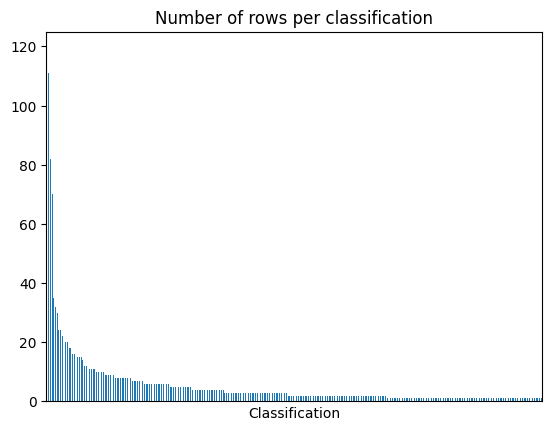

In [19]:
# plot on a graph the number of rows with the same classification value and do not include x-axis marks
data['Classification'].value_counts().plot(kind='bar', title='Number of rows per classification').tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

Food Group
Meat, poultry and game products and dishes       465
Vegetable products and dishes                    235
Cereals and cereal products                      162
Fruit products and dishes                        124
Fish and seafood products and dishes             115
Cereal based products and dishes                 101
Milk products and dishes                          53
Non-alcoholic beverages                           50
Seed and nut products and dishes                  38
Savoury sauces and condiments                     37
Fats and oils                                     34
Confectionery and cereal/nut/fruit/seed bars      32
Miscellaneous                                     32
Dairy & meat substitutes                          29
Alcoholic beverages                               28
Legume and pulse products and dishes              25
Sugar products and dishes                         19
Egg products and dishes                           11
Snack foods                        

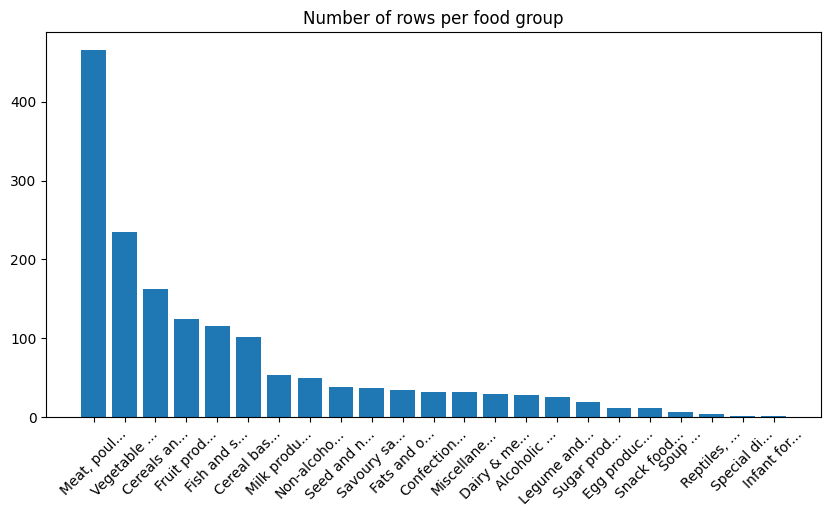

In [20]:
from matplotlib import pyplot as plt

# convert classification to food group code defined as taking the slice of the string for first 2 characters
data['Classification'] = data['Classification'].astype(str).str.slice(0, 2)

# convert to int and 0 if string cannot be converted to int
data['Classification'] = pd.to_numeric(data['Classification'], errors='coerce').fillna(0).astype(int)

# merge the food groups with the data
data = pd.merge(data, food_groups, left_on='Classification', right_on='Food Group Code')

# rename the columns
data = data.rename(columns={'Food Group and Sub-Group Name': 'Food Group'})

# print the number of rows per food group
print(data['Food Group'].value_counts())

# limit the length of the food group names to fixed characters and add ... to the end
data['Food Group'] = data['Food Group'].str.slice(0, 10) + '...'

# plot on a graph the number of rows with the same food group value
plt.figure(figsize=(10, 5))
value_counts = data['Food Group'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title('Number of rows per food group')
plt.xticks(rotation=45)
plt.savefig('../report/figs/number-of-rows-per-food-group.png', bbox_inches='tight')
plt.show()